<small>August 7, 2024</small> | <small>Entry No. 2</small>

# Table of Contents
1. [Averages](#averages)
2. [Comparisons](#comparisons)
3. [Correlations](#correlations)
4. [Understanding the Data](#fourth-examplehttpwwwfourthexamplecom)

## Averages
`avg.py`

This journal follows the code from the "avg" command. It produces graphical data on the averages of sensor data points over time. Values for all device MACS are averaged in itself to get the control data. Test data is the JSON file produced by batch-builder.py. In this example, it is "./home/jeremy/Documents"/AGT/__files__/batches/parsley.json"

Get required imports.

In [53]:
# Import OS, JSON, Matplotlib, inline

import os
import json
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

This will be a lot of data, so creating a 2x2 grid is ideal for the four primary sensor types.

In [41]:
# Function to plot data
def plot_sensor_data(data, title):
    # Extract timestamps and sensor data
    timestamps = [entry['Timestamp'] for entry in data]
    temperatures = [entry['Temperature'] for entry in data]
    moistures = [entry['Moisture'] for entry in data]
    lights = [entry['Light'] for entry in data]
    conductivities = [entry['Conductivity'] for entry in data]

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 6), sharex=True)
    fig.suptitle(title, fontsize=16)

    # Plot Temperature data
    axs[0, 0].plot(timestamps, temperatures, label='Temperature', color='maroon', linestyle='-.', marker='o', markersize=5, linewidth=2)
    axs[0, 0].set_ylabel('Temperature')
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    # Plot Moisture data
    axs[0, 1].plot(timestamps, moistures, label='Moisture', color='blue', linestyle='-.', marker='s', markersize=5, linewidth=2)
    axs[0, 1].set_ylabel('Moisture')
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    # Plot Light data
    axs[1, 0].plot(timestamps, lights, label='Light', color='green', linestyle='-.', marker='^', markersize=5, linewidth=2)
    axs[1, 0].set_ylabel('Light')
    axs[1, 0].legend()
    axs[1, 0].grid(True)

    # Plot Conductivity data
    axs[1, 1].plot(timestamps, conductivities, label='Conductivity', color='orange', linestyle=':', marker='d', markersize=5, linewidth=2)
    axs[1, 1].set_ylabel('Conductivity')
    axs[1, 1].legend()
    axs[1, 1].grid(True)

    # Set x-label for bottom row
    axs[1, 0].set_xlabel('Timestamp')
    axs[1, 1].set_xlabel('Timestamp')

    plt.tight_layout()
    plt.show()

Averages of synthetic test data from batch folder.

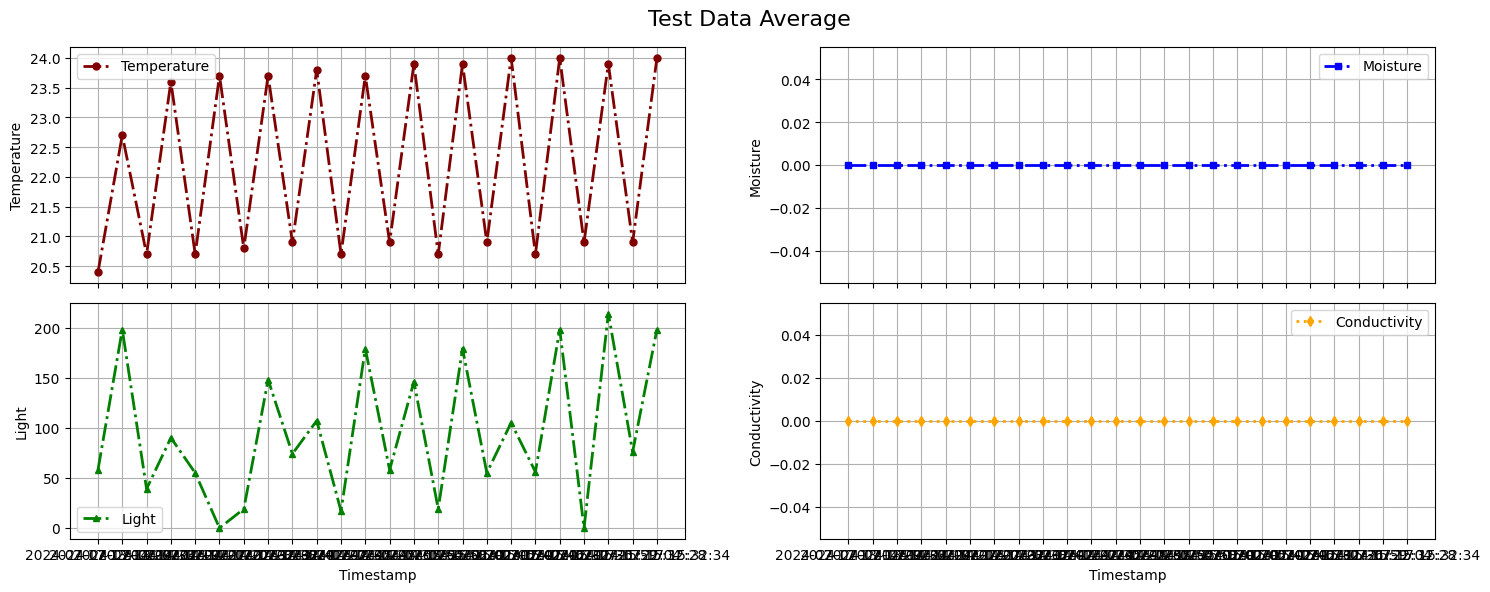

In [42]:
# Load and plot test data
test_json_file_path = '/home/jeremy/Documents/AGT/__files__/read_files/2024-07-17/AGT-2024-07-17.json'
with open(test_json_file_path, 'r') as file:
    test_data = json.load(file)
plot_sensor_data(test_data, 'Test Data Average')

Averages of data collected from sensors.

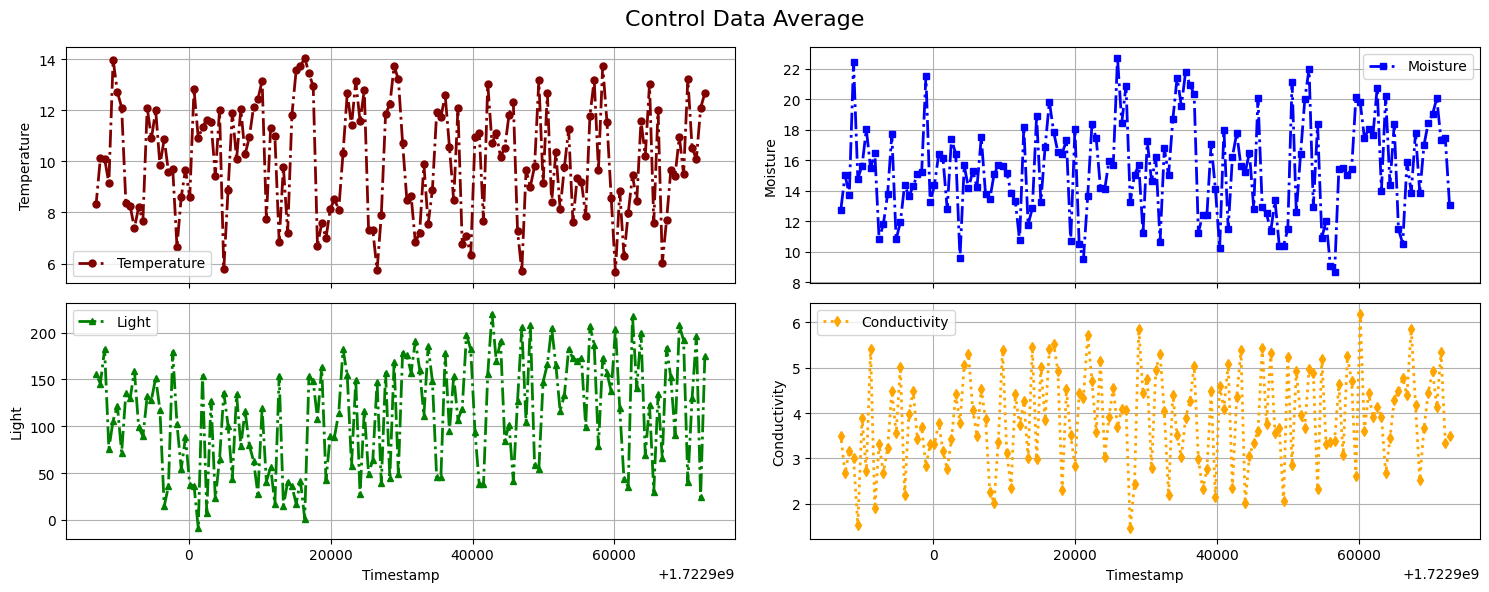

In [43]:
# Load and plot control data
control_json_file_path = '/home/jeremy/Documents/AGT/__files__/batches/parsley.json'
with open(control_json_file_path, 'r') as file:
    control_data = json.load(file)
plot_sensor_data(control_data, 'Control Data Average')

## Comparisons

### Looking for Trends
`trends.py`

Putting the two datasets on a linear graph, we can compare them side be side.

In [47]:
def plot_trend_data(test_data, control_data, title):
    # Convert to DataFrames for easy manipulation
    test_df = pd.DataFrame(test_data)
    control_df = pd.DataFrame(control_data)

    # Ensure 'Timestamp' is in datetime format
    test_df['Timestamp'] = pd.to_datetime(test_df['Timestamp'])
    control_df['Timestamp'] = pd.to_datetime(control_df['Timestamp'])

    # Merge the DataFrames on 'Timestamp' to align the data
    merged_df = pd.merge_asof(test_df.sort_values('Timestamp'), control_df.sort_values('Timestamp'), 
                               on='Timestamp', suffixes=('_test', '_control'))

    # Extract columns for plotting
    timestamps = merged_df['Timestamp']
    test_temperatures = merged_df['Temperature_test']
    control_temperatures = merged_df['Temperature_control']
    test_moistures = merged_df['Moisture_test']
    control_moistures = merged_df['Moisture_control']
    test_lights = merged_df['Light_test']
    control_lights = merged_df['Light_control']
    test_conductivities = merged_df['Conductivity_test']
    control_conductivities = merged_df['Conductivity_control']

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 6), sharex=True)
    fig.suptitle(title, fontsize=16)

    # Plot Temperature data
    axs[0, 0].plot(timestamps, test_temperatures, label='Test Temperature', color='maroon', linestyle='-.', marker='o', markersize=5, linewidth=2)
    axs[0, 0].plot(timestamps, control_temperatures, label='Control Temperature', color='red', linestyle='--', marker='x', markersize=5, linewidth=2)
    axs[0, 0].set_ylabel('Temperature')
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    # Plot Moisture data
    axs[0, 1].plot(timestamps, test_moistures, label='Test Moisture', color='blue', linestyle='-.', marker='s', markersize=5, linewidth=2)
    axs[0, 1].plot(timestamps, control_moistures, label='Control Moisture', color='skyblue', linestyle='--', marker='P', markersize=5, linewidth=2)
    axs[0, 1].set_ylabel('Moisture')
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    # Plot Light data
    axs[1, 0].plot(timestamps, test_lights, label='Test Light', color='green', linestyle='-.', marker='^', markersize=5, linewidth=2)
    axs[1, 0].plot(timestamps, control_lights, label='Control Light', color='lightgreen', linestyle='--', marker='v', markersize=5, linewidth=2)
    axs[1, 0].set_ylabel('Light')
    axs[1, 0].legend()
    axs[1, 0].grid(True)

    # Plot Conductivity data
    axs[1, 1].plot(timestamps, test_conductivities, label='Test Conductivity', color='orange', linestyle=':', marker='d', markersize=5, linewidth=2)
    axs[1, 1].plot(timestamps, control_conductivities, label='Control Conductivity', color='gold', linestyle='--', marker='*', markersize=5, linewidth=2)
    axs[1, 1].set_ylabel('Conductivity')
    axs[1, 1].legend()
    axs[1, 1].grid(True)

    # Set x-label for bottom row
    axs[1, 0].set_xlabel('Timestamp')
    axs[1, 1].set_xlabel('Timestamp')

    plt.tight_layout()
    plt.show()

Load chart comparing averages from test and control data. 

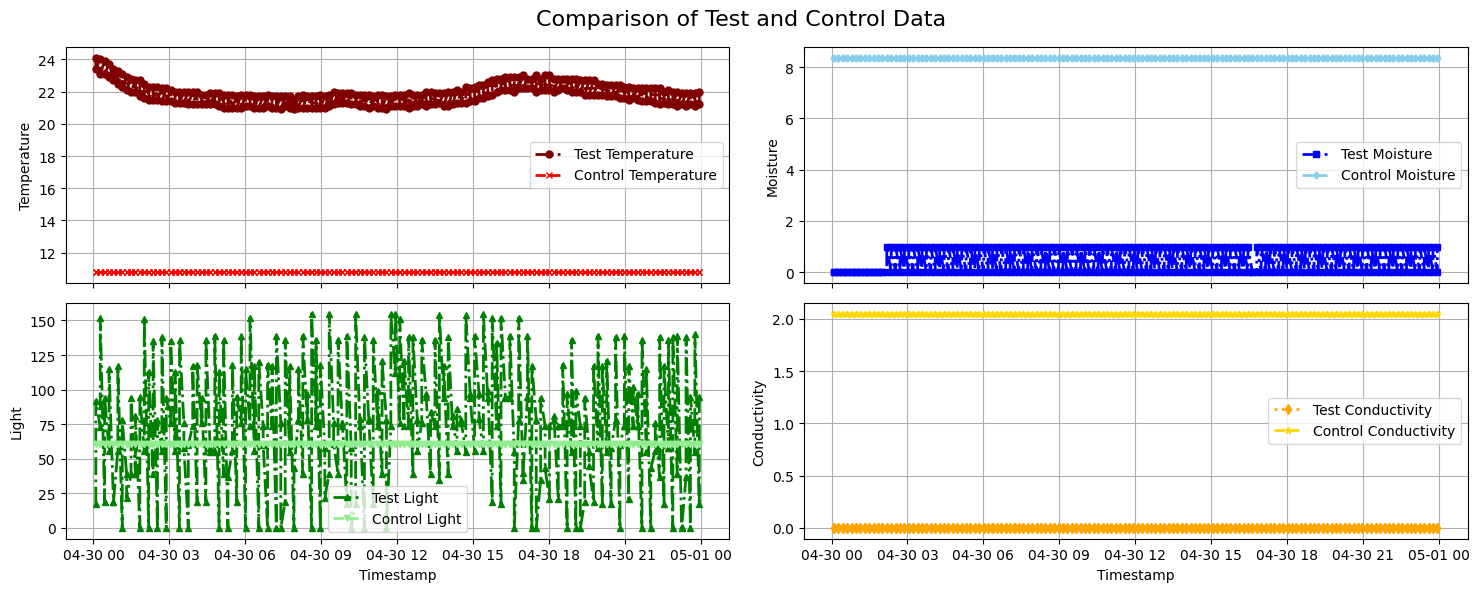

In [54]:
# Load test data
test_json_file_path = '/home/jeremy/Documents/AGT/__files__/read_files/2024-04-30/AGT-2024-04-30.json'
with open(test_json_file_path, 'r') as file:
    test_data = json.load(file)

# Load control data
control_json_file_path = '/home/jeremy/Documents/AGT/__files__/batches/t_parsley.json'
with open(control_json_file_path, 'r') as file:
    control_data = json.load(file)

# Plot both test and control data
plot_sensor_data(test_data, control_data, 'Comparison of Test and Control Data')

## Correlations

## Measuring Correlation

`corr.py`

a Perason correlation coefficient can measure the linear relationship between the test and control data. 

It ranges from -1 to 1 with 1 being perfect correlation, 0 no relationship and -1 a perfect negative relationship. This means as one value increases, the other decreases proportionally. 

In [55]:
import seaborn as sns

Next we will show the data types to understand what transformations are needed

In [64]:
test = pd.read_json("/home/jeremy/Documents/AGT/__files__/batches/t_parsley.json")
control = pd.read_json("/home/jeremy/Documents/AGT/__files__/read_files/2024-07-17/AGT-2024-07-17.json")

# Combine the data from both DataFrames
df = pd.concat([test, control], ignore_index=True)

# Check the data types to understand what transformations are needed
print(df.dtypes)

# Convert the columns if they are lists or other non-float types
if isinstance(df['Moisture'].iloc[0], list):
    df['Moisture'] = df['Moisture'].apply(lambda x: x[0] if isinstance(x, list) else x)

if isinstance(df['Light'].iloc[0], list):
    df['Light'] = df['Light'].apply(lambda x: x[0] if isinstance(x, list) else x)

if isinstance(df['Temperature'].iloc[0], list):
    df['Temperature'] = df['Temperature'].apply(lambda x: x[0] if isinstance(x, list) else x)

if isinstance(df['Conductivity'].iloc[0], list):
    df['Conductivity'] = df['Conductivity'].apply(lambda x: x[0] if isinstance(x, list) else x)


Timestamp       datetime64[ns]
Temperature            float64
Moisture               float64
Light                  float64
Conductivity           float64
MAC                     object
dtype: object


              Temperature  Moisture     Light  Conductivity
Temperature      1.000000 -0.297569  0.229173     -0.314347
Moisture        -0.297569  1.000000 -0.157165      0.173739
Light            0.229173 -0.157165  1.000000     -0.120171
Conductivity    -0.314347  0.173739 -0.120171      1.000000


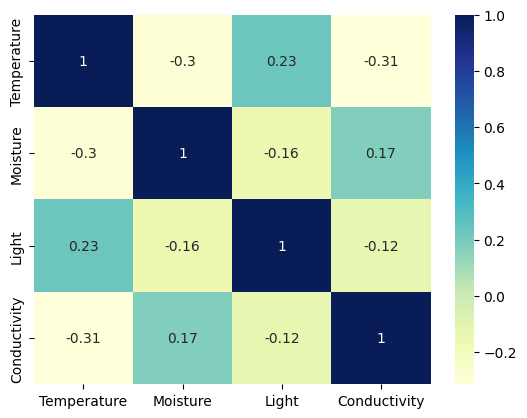

In [65]:
# Convert to float (if not already)
df['Moisture'] = df['Moisture'].astype(float)
df['Light'] = df['Light'].astype(float)
df['Temperature'] = df['Temperature'].astype(float)
df['Conductivity'] = df['Conductivity'].astype(float)

# Calculate the Pearson correlation coefficient between light and temperature
correlation = df.corr(numeric_only=True)

# Create a heatmap to visualize the correlation
sns.heatmap(correlation, annot=True, cmap='YlGnBu')

print(correlation)

Based on the output of your heatmap, it will show the correlation values between -1 to 1.0.

In [ ]:
plt.show()

print(correlation)

<small>&copy; Agrotech Live 2024</small>